In [1]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


49


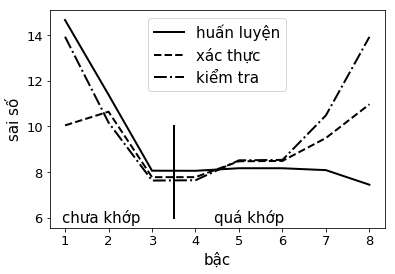

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(5)
from sklearn import datasets, linear_model

N = 50
N_test = 10 
X = np.random.rand(N, 1)*5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

# split train to train + valid use train_test_split 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( \
     X, y, test_size=0.33, random_state=0)

# generate test data
X_test = (np.random.rand(N_test,1)) *5
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in xrange(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def poly(a, x):
    """
    return a[0] + a[1]*x + a[2]*x**2 + .... 
    """
    res = np.zeros_like(x)
    for i in xrange(len(a) - 1, -1, -1):
        res = res*x + a[i] 
    return res 

x = 2
a = [1, 2, 3, 4]
print(poly(a, x))

def MSE(x, y, w):     
    d = len(w) - 1
    y_pred = poly(w, x)
    return np.mean(np.abs(y - y_pred))

def myfit(d):
    Xbar = buildX(X_train, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y_train)

    w = regr.coef_[0]
    train_err = MSE(X_train, y_train, w)
    valid_err = MSE(X_valid, y_valid, w)
    test_err = MSE(X_test, y_test, w)
                    
    return (train_err, valid_err, test_err)
    
    
Train_error = []
Test_error = []
Valid_error = []
degree = 9
for d in xrange(1, degree):
    (train_err, valid_err, test_err) = myfit(d) 
    Train_error.append(train_err)
    Test_error.append(test_err)
    Valid_error.append(valid_err)

degree = xrange(1, degree)

fig = plt.figure()
# fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

plt.plot(degree, Train_error, 'k-', linewidth = 2, label = "huấn luyện")
plt.plot(degree, Valid_error, 'k--', linewidth = 2, label = "xác thực")
plt.plot(degree, Test_error, 'k-.', linewidth = 2, label = "kiểm tra")
plt.legend(loc="tốt nhất", fontsize = 15)
plt.xlabel('bậc', fontsize = 15)
plt.ylabel('sai số', fontsize = 15)


plt.plot([3.5, 3.5], [6, 10], color='k', linestyle='-', linewidth=2)

plt.tick_params(axis='both', which='major', labelsize=13)
ax.text(0.7, 0.01, 'quá khớp',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='k', fontsize=15)
ax.text(0.27, 0.01, 'chưa khớp',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='k', fontsize=15)
# plt.savefig('linreg_val.png', bbox_inches='tight', dpi = 600)
from matplotlib.backends.backend_pdf import PdfPages
# with PdfPages('linreg_val.pdf') as pdf:
#     pdf.savefig(bbox_inches='tight')
plt.savefig('lỉnreg_val.png', bbox_inches = 'tight', dpi = 700)
plt.show()
